___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

In [1]:
# bir onceki ders : 


# deep learningde en onemli konu datanin cok olmasi. 
# regression problemlerinde linear activation kullanilir. Cunku degerlerimiz 45 ise 45 olarak cikmali. 
# sigmoid kullanirsak 0 ile 1 arasinda cikartir. 


In [2]:
# epoch : Butun datanin kac defa islenmis olmasina denir. 
# batch : datanin group group islenmis olmasi. batch_size= toplam data sayisis / toplam batch sayisi.  
# 1000 tane datam varsa ve ben bunun icin her group icin bath size=100 ise dolayisyla 10 tane iteration olur. 
# bir epoch aslinda iterationlarda olusuyor. 1 epoch = batch size * iteration. 

In [3]:
# gradient descent : cost function i minimize etmek icin optimization methodu.
# step size =  slope * learning rate
# learning rate cok buyuk olursa step size buyur. bu yuzden minimim value degeri atlayabilit optimization yaparken.
# bu yuzden leaarnin rate cok buuyk secmemeliyiz. 

In [4]:
# en iyi calisan optimization methodu "adam" dir. biz bunu kullanacagiz. 

In [5]:
# Backpropagation : geriye yagilim. 
# Neural network deyince aklimiza iki sey gelir: 1. Mimari (Artchitucre), 2.Ogrenme methodu (learnin method)

In [6]:
# RNN, ANN, CNN bir mimaridir. 
# Backpropagation ise bir ogrenmedir. 
# gradient decsent kullanarak geriye donup tum katsayilari ayarlar. 
# feed forward data : ileri dogru besleme. 
# bir satir isleme firer (feed forward) ve burda bir hata olusur. 
# sonra gradient descent ile katsayilari geriye donup update eder.
# ayni islemi diger satir icin yapar. bu sekilde son satira kadar islem devam eder. 
# en sonunda hatamiz gittikce kuculur. 
# biz buna Backpropagation diyoruz 

In [7]:
# Backpropagation batch nasil calisir?
# cvp : bu sefer her batch icindeki her bir iteretion icin bir hata bulur sonra bu hatalarin ortalamasini alir...
# ... ve yukarda soyledigim islemleri bu sefer ortalama errorlar icin yapar.

# Installing Tensorflow

In [8]:
!python --version

Python 3.9.13


In [9]:
#pip install tensorflow

In [10]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [12]:
#from google.colab import drive
#drive.mount('/content/drive') 

In [13]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [14]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [15]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


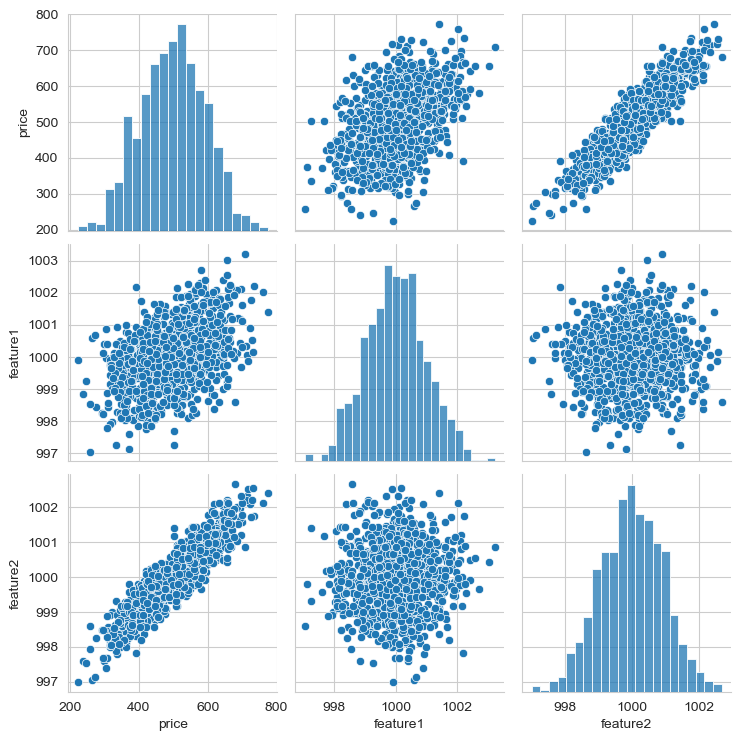

In [18]:
sns.pairplot(df);

In [19]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values
# normalde datalarmizin array olmasi gerekiyor. 
# biz asagida scaling yapacagimiz icin burda array a cevirmeye gerek yok. 

In [22]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [23]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [24]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
X_train.shape

(700, 2)

In [27]:
X_test.shape

(300, 2)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [34]:
# help(Sequential)

In [35]:
# help(Dense)

In [36]:
X_train.shape

(700, 2)

In [37]:
# First way to create model
# iki farkli yol var bu birinci yol. ikinci yol asagida.
# dense layer ekle demek. 
# units : layerdaki neron sayisini veriyor.
model = Sequential([Input(shape = X_train.shape[1]),# gris layer
                    Dense(units = 4, activation = "relu"), #  birinci hidden layer, 4 neronlu, activation func: relu
                    Dense(units = 4, activation = "relu"), # ikinci hidden layer, 4 neronlu, af : relu
                    Dense(units = 4, activation = "relu"), # ucuncu hidden layer, 4 neron, af: relu
                    Dense(units = 1)]) # cikis layer, 1 neron, af: linear (default oldugu icin yazilmadi)

In [38]:
# Second way to create model (recommended)
# en cok bu yolu tercih edecegiz. 
model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [39]:
model.summary() # none batch size ile alakali. 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.40727615,  0.5911591 , -0.9557426 , -0.90449166],
        [-0.05171061, -0.8142786 ,  0.652668  , -0.9434526 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.5900187 ,  0.4565392 ,  0.5653061 ,  0.38728458],
        [ 0.686498  , -0.8271209 ,  0.7150697 , -0.30473357],
        [-0.6784831 ,  0.75097233, -0.3098932 ,  0.68600184],
        [-0.06727767,  0.86259764,  0.27592593,  0.6803561 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.5092632 , -0.8058965 ,  0.6693042 ,  0.37700135],
        [-0.37084922, -0.00556558,  0.31510752,  0.5981805 ],
        [-0.8369925 ,  0.84372014, -0.0331

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [41]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [42]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256615.4219
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256447.2500
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256260.6562
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256038.5156
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255780.4531
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255479.4219
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255127.8906
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254723.0156
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254263.5156
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253742.4844
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253154.6094
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 907.0874
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 872.5027
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 836.0793
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 798.5613
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 769.9961
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 733.1057
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 712.7831
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 678.7233
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 645.7929
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 616.5596
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 587.8272
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 561.8535
Epoch 10

22/22 [==============================] - 0s 1ms/step - loss: 24.4830
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5057
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5665
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 23.8721
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1607
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 24.0175
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5180
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2356
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3855
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.6474
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2923
Epoch 206/250
22/22 [==============================] - 0s 942us/step - loss: 24.8929
Epoch 207/250
22

In [43]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.8449563 ,  1.2924639 ,  0.47484273, -0.90449166],
        [ 2.491773  ,  1.0057003 ,  3.1885526 , -0.9434526 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.6268799 , -0.10520206,  0.6186739 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.005561  ,  2.0821366 ,  2.1255543 ,  2.0311167 ],
        [ 1.6814338 ,  0.30831093,  1.8213736 ,  0.80302155],
        [ 0.964884  ,  2.598745  ,  1.4739524 ,  2.5504158 ],
        [-0.06727767,  0.86259764,  0.27592593,  0.6803561 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.40289617, 0.59735566, 0.5373333 , 0.61659914], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.5092632 ,  0.7502013 ,  1.6335952 ,  1.9299287 ],
        [-0.37084922,  1.6434872 ,  

In [44]:
model.history.history

{'loss': [256615.421875,
  256447.25,
  256260.65625,
  256038.515625,
  255780.453125,
  255479.421875,
  255127.890625,
  254723.015625,
  254263.515625,
  253742.484375,
  253154.609375,
  252497.875,
  251761.421875,
  250950.03125,
  250052.28125,
  249049.96875,
  247944.578125,
  246725.78125,
  245370.46875,
  243898.5625,
  242282.1875,
  240516.40625,
  238601.375,
  236521.71875,
  234273.046875,
  231869.515625,
  229270.625,
  226480.09375,
  223493.625,
  220309.078125,
  216923.46875,
  213304.40625,
  209463.25,
  205371.59375,
  201024.234375,
  196418.328125,
  191542.5,
  186378.765625,
  180911.15625,
  175180.90625,
  169149.390625,
  162833.125,
  156284.625,
  149529.546875,
  142522.265625,
  135265.796875,
  127827.3515625,
  120218.96875,
  112428.125,
  104517.2890625,
  96504.09375,
  88456.7421875,
  80374.6953125,
  72397.796875,
  64458.99609375,
  56671.49609375,
  49078.9296875,
  41820.671875,
  34823.953125,
  28348.611328125,
  22392.322265625,
  170

In [45]:
pd.DataFrame(model.history.history)

,loss
0,256615.422
1,256447.250
2,256260.656
3,256038.516
4,255780.453
...,...
245,25.014
246,24.534
247,24.583
248,24.365


<AxesSubplot:>

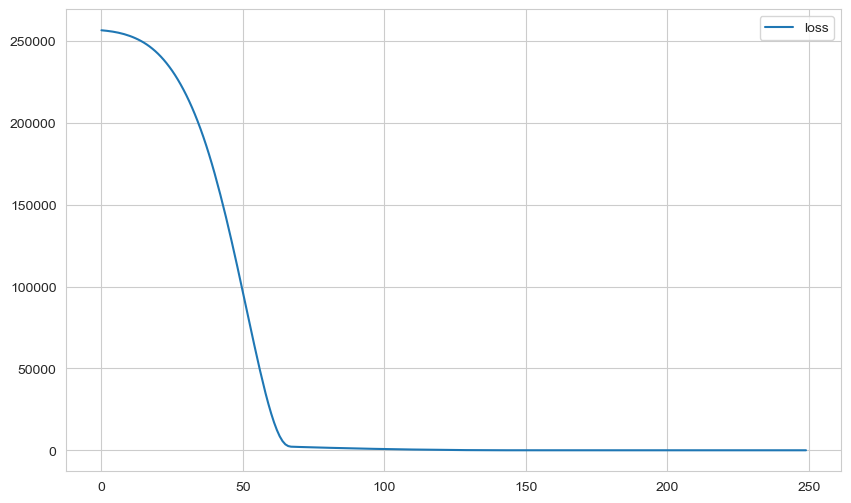

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

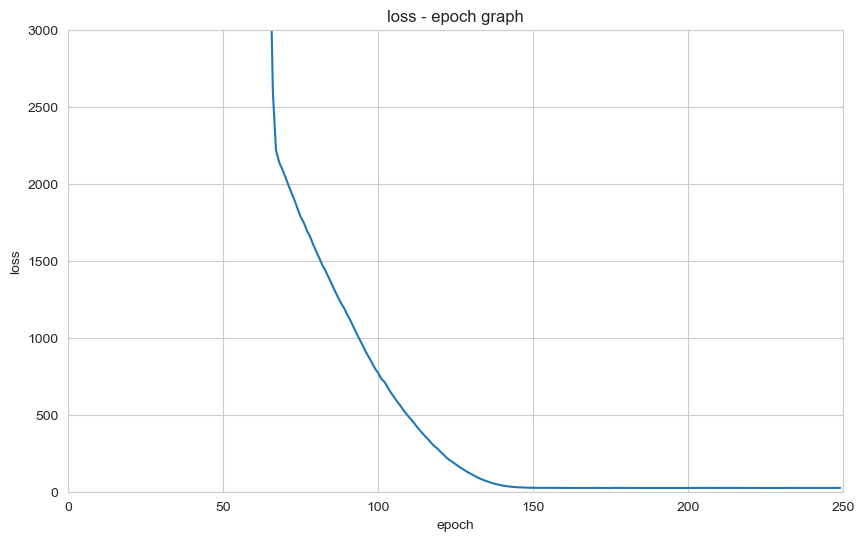

In [47]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
model.evaluate(X_train, y_train, verbose=0)

23.772550582885742

In [50]:
model.evaluate(X_test, y_test, verbose=0)

25.382030487060547

In [51]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 1ms/step


(300, 1)

In [52]:
y_test.shape

(300,)

In [53]:
y_pred.reshape(-1,).shape

(300,)

In [54]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
679,466.000,466.500
737,624.156,624.239
621,448.519,438.855
139,488.787,485.634
734,503.271,508.980
687,507.443,502.452
998,403.316,403.667
141,518.007,521.652
519,553.905,552.218
250,375.959,382.155


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

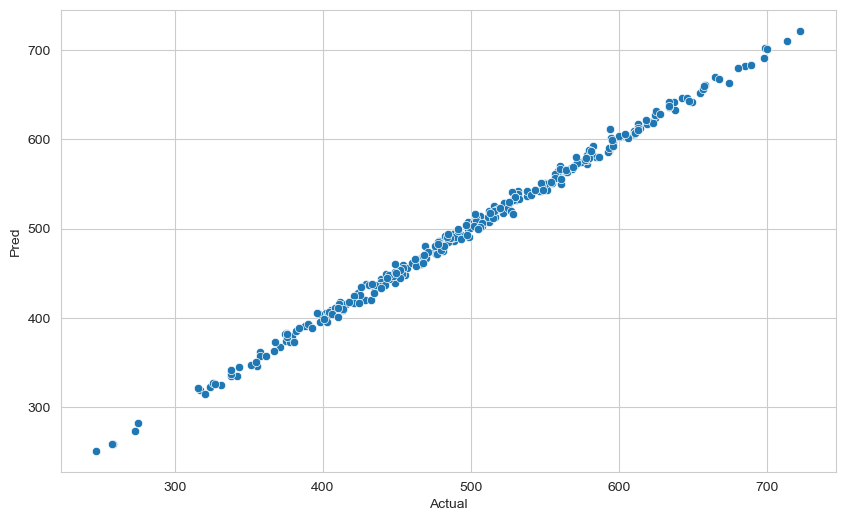

In [55]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [56]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [57]:
eval_metric(y_test, y_pred)

r2_score: 0.9971130619085385 
mae: 4.053435264857672 
mse: 25.382051116215237 
rmse: 5.038060253333145


## Final Model and Model Deployment

### Final Model Training

In [58]:
scaler = MinMaxScaler().fit(X)

In [59]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [60]:
X_scaled = scaler.transform(X)

In [61]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257460.2344
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257407.2656
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257373.7031
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 257341.6562
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 257309.8594
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 257277.8750
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 257245.9531
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 257214.0625
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 257182.1875
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 257150.3750
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 257118.5469
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 1ms/step - loss: 254416.6875
Epoch 97/250
32/32 [==============================] - 0s 1ms/step - loss: 254385.0156
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 254353.3750
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 254321.6406
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 254290.0625
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 254258.2656
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 254226.6875
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 254194.9531
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 254163.2969
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 254131.5312
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 254099.9531
Epoch 107/250
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 251446.1719
Epoch 191/250
32/32 [==============================] - 0s 1ms/step - loss: 251414.6562
Epoch 192/250
32/32 [==============================] - 0s 1ms/step - loss: 251383.1719
Epoch 193/250
32/32 [==============================] - 0s 984us/step - loss: 251351.6875
Epoch 194/250
32/32 [==============================] - 0s 1ms/step - loss: 251320.1406
Epoch 195/250
32/32 [==============================] - 0s 1ms/step - loss: 251288.7500
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 251257.1875
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 251225.6094
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 251194.1094
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 251162.6875
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 251131.2969
Epoch 201/250
32/32 [==============================] - 

In [62]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [ ]:
# final modlimizi save derken save kullaniyoruz. 

In [63]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [64]:
#final_model.save("model_fake_reg") 

### Loading Model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model_fake_reg = load_model('model_fake_reg.h5')

In [67]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [68]:
sample = [[998, 1000]]

In [69]:
sample_scaled = scaler_fake_reg.transform(sample)

In [70]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 121ms/step


array([[8.004037]], dtype=float32)

## Prediction-2

In [71]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [72]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [73]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [74]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 46ms/step


array([[8.004037],
       [8.004037],
       [8.004037],
       [8.004037],
       [8.004037]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___